In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

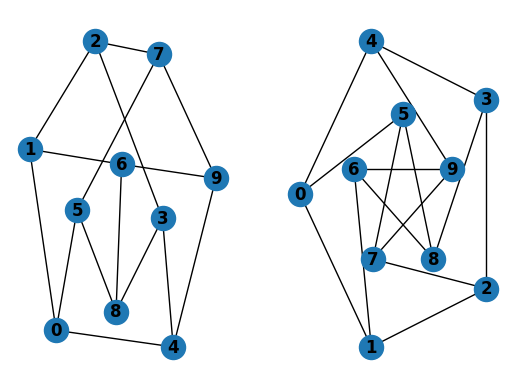

In [3]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')


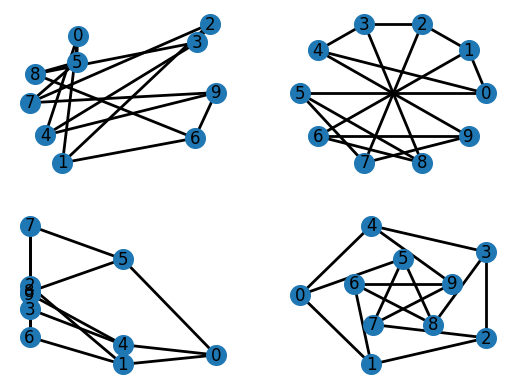

In [33]:
options = {
    'with_labels': True,
    'node_size': 200,
    'width': 2, # thickness of edges
}

plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)    
nx.draw_shell(G, nlist=[range(5, 10), range(5)], **options)


Is the graph strongly connected?
Short way:  False
Long way:  False
Is the graph weakly connected?
Short way:  True
Long way:  True


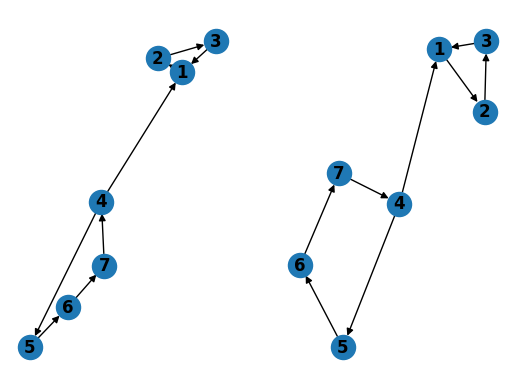

In [42]:
# a lot of algorithms are available from the graph theory
# it is possible to perform complex graph analysis in a simple way:

# networkx.algorithms.<TAB>:

# nx.algorithms.components
# nx.algorithms.cycles

##############################
# strong connectivity (only possible when directed graph)

DG = nx.DiGraph()
DG.add_edges_from([(1,2),(2,3),(3,1),(4,5),(5,6),(6,7),(7,4),(4,1)])
plt.subplot(121)
nx.draw(DG, with_labels=True, font_weight='bold')

# strongly connected?
answer_short = nx.is_strongly_connected(DG)

# it is possible to write it the long way:
answer_long = nx.algorithms.components.strongly_connected.is_strongly_connected(DG)

# print both answers with description
print("Is the graph strongly connected?")
print("Short way: ", answer_short)
print("Long way: ", answer_long)

# weakly connected?
plt.subplot(122)
nx.draw(DG, with_labels=True, font_weight='bold')
answer_short = nx.is_weakly_connected(DG)
answer_long = nx.algorithms.components.weakly_connected.is_weakly_connected(DG)
print("Is the graph weakly connected?")
print("Short way: ", answer_short)
print("Long way: ", answer_long)


Number of connected components: 2


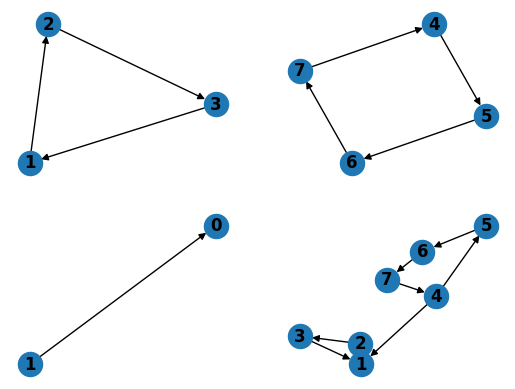

In [86]:
ncc = nx.number_strongly_connected_components(DG)
print("Number of connected components:", ncc)

# strongly connected components
scc = nx.strongly_connected_components(DG)
sub1, sub2 = scc

# draw them
plt.subplot(221)
nx.draw(DG.subgraph(sub1), with_labels=True, font_weight='bold')
plt.subplot(222)
nx.draw(DG.subgraph(sub2), with_labels=True, font_weight='bold')

# condensation graph
condensation = nx.condensation(DG)
plt.subplot(223)
nx.draw(condensation, with_labels=True, font_weight='bold')

# original graph
plt.subplot(224)
nx.draw(DG, with_labels=True, font_weight='bold')


In [99]:
# question: can a condensation graph with more than one node be strongly connected?
# answer: no, because if it was strongly connected, it would mean that the original graph was strongly connected

# explore a condensation graph
print("Nodes:", dict(condensation.nodes()))

# mapping:
mapping = condensation.graph['mapping']
print("Mapping:", mapping)

Nodes: {0: {'members': {1, 2, 3}}, 1: {'members': {4, 5, 6, 7}}}
Mapping: {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1}


Number of sinks: 1
Sink: {1, 2, 3}


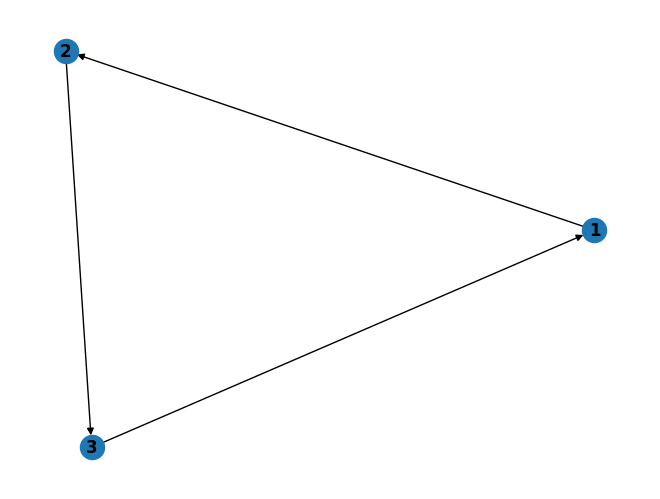

In [125]:
# let's  dive into sinks:
# number of snks: attracting components of DG
number_sinks = nx.number_attracting_components(DG)
print("Number of sinks:", number_sinks)

# sinks: attracting components of DG
sinks = nx.attracting_components(DG)
for s in sinks: print("Sink:", s)

# or we can use the subgraph function
for s in nx.attracting_components(DG):
    nx.draw(DG.subgraph(s), with_labels=True, font_weight='bold')


In [132]:
# a cycle is a closed path where no node appears twice.
# two cycles are different if they are not cyclic permutations of each other.

# networkx provides a function to find cycles in a graph: simple_cycles(G)
# it returns a generator of lists of nodes, one for each cycle.

for cycle in nx.simple_cycles(DG):
    print(f"Cycle: {cycle}\tLength: {len(cycle)}")

Cycle: [4, 5, 6, 7]	Length: 4
Cycle: [1, 2, 3]	Length: 3


In [150]:
# period of a node:
# Greatest common divisor of all cycle lengths that pass through the node.

# import GCD function from math module
from math import gcd
from functools import reduce

# let's find the period of each node
cycles = list(nx.simple_cycles(DG))

for node in DG.nodes:
    # find lens of cycles that pass through that node
    cycles_len = [len(cycle) for cycle in cycles if node in cycle]
    # find GCD of lens
    period = reduce(gcd, cycles_len)
    print(f"Node: {node}\t|\tPeriod: {period}")



Node: 1	|	Period: 3
Node: 2	|	Period: 3
Node: 3	|	Period: 3
Node: 4	|	Period: 4
Node: 5	|	Period: 4
Node: 6	|	Period: 4
Node: 7	|	Period: 4
